# Handling Numerical Missing Data:

## Simple Imputer using Sklearn:

**SimpleImputer** is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.

**strategy :** The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’. 

**fill_value :** The constant value to be given to the NaN data using the constant strategy. 

### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset:

In [2]:
df=pd.read_csv('../Numerical_data_imputation/data_science_job.csv')
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
3068,31140,city_16,0.910,Male,No relevent experience,no_enrollment,Primary School,NaN,0.0,NaN,NaN,31.0,0.0
4023,11222,city_73,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,16.0,<10,Pvt Ltd,42.0,0.0
12458,21993,city_136,0.897,NaN,No relevent experience,Full time course,Graduate,No Major,3.0,<10,Pvt Ltd,77.0,0.0
9066,17678,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,198.0,1.0
3943,18085,city_102,0.804,Male,Has relevent experience,no_enrollment,Graduate,Other,20.0,NaN,NaN,20.0,1.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [4]:
print(df.isnull().sum())
print(df.isnull().mean()*100)

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64
enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64


In [5]:
df=df.select_dtypes(include=np.number)
df

,enrollee_id,city_development_index,experience,training_hours,target
0,8949,0.920,20.0,36.0,1.0
1,29725,0.776,15.0,47.0,0.0
2,11561,0.624,5.0,83.0,0.0
3,33241,0.789,0.0,52.0,1.0
4,666,0.767,20.0,8.0,0.0
...,...,...,...,...,...
19153,7386,0.878,14.0,42.0,1.0
19154,31398,0.920,14.0,52.0,1.0
19155,24576,0.920,20.0,44.0,0.0
19156,5756,0.802,0.0,97.0,0.0


**CONDITION TO USE**
- Data missing completly at random (MCAR).
- Missing data <5%.

In [6]:
# Extract those columns which lies in that condition.

df1=[col for col in df.columns if 0 < df[col].isnull().mean() * 100 < 5]
df1

['city_development_index', 'experience', 'training_hours']

In [7]:
df.drop(columns=['enrollee_id','city_development_index',],inplace=True)

In [8]:

# Now check weather the data is (MCAR) or not.

df.loc[df['experience'].isnull()].head(50)

,experience,training_hours,target
135,NaN,70.0,0.0
391,NaN,44.0,1.0
1589,NaN,33.0,0.0
2727,NaN,70.0,0.0
2859,NaN,41.0,1.0
3086,NaN,62.0,1.0
3564,NaN,34.0,0.0
3760,NaN,24.0,0.0
4003,NaN,103.0,0.0
4207,NaN,96.0,1.0


**So both condition true on experience column**
**Now check**
- Distribution of data Before and After imputation.
- Check the covarience.
- Check correlation of data. 
- Make boxplot to check outliers.
  
**Check DIstribution**
**DO's and Don'ts**
- If distribution is change after impution their is red flag.
- if not green flag ('Slightly change in distribution is ok').

In [9]:
# Lets check which options is better for impuate missing values on numerical data.

mean_exp=df['experience'].mean()
median_exp=df['experience'].median()

print('mean of exp is',mean_exp)
print('median of exp is',median_exp)

mean of exp is 9.92803645315037
median of exp is 9.0


In [10]:
# Fill both to check which is best for imputation.

df['exp_mean']=df['experience'].fillna(mean_exp)
df['exp_median']=df['experience'].fillna(median_exp)

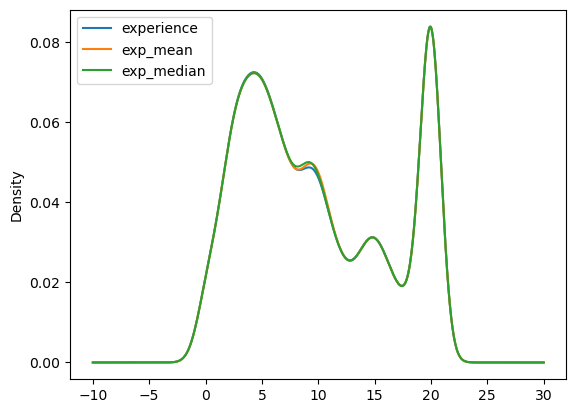

In [11]:
plt.figure
ax=plt.subplot(1,1,1)

df['experience'].plot(kind='kde')
df['exp_mean'].plot(kind='kde')
df['exp_median'].plot(kind='kde')

ax.legend()


**Nothing changes in distribution we are good to go** 
**Check Varience**
**Do's & Don'ts**
- If varience is changed drasticly then red flag
- if little bit of same then green flag.

In [12]:
# Check Varience

print('Original data varience',df['experience'].var())
print('After mean data varience',df['exp_median'].var())
print('After median data varience',df['exp_mean'].var())

Original data varience 42.31851676548554
After mean data varience 42.177841703224644
After median data varience 42.17492937759826



**Check Correlation**

**Do's & Don'ts**
- If the correlation from original column is changed drasticly then red flag
- If slighter then green flag.

In [13]:
# Check correlation

df.corr()


,experience,training_hours,target,exp_mean,exp_median
experience,1.000000,-0.000815,-0.178238,1.000000,1.000000
training_hours,-0.000815,1.000000,-0.021706,-0.000814,-0.000861
target,-0.178238,-0.021706,1.000000,-0.177850,-0.177961
exp_mean,1.000000,-0.000814,-0.177850,1.000000,0.999965
exp_median,1.000000,-0.000861,-0.177961,0.999965,1.000000


**Make Boxplot to check after imputation impacte of outliers**

<Axes: >

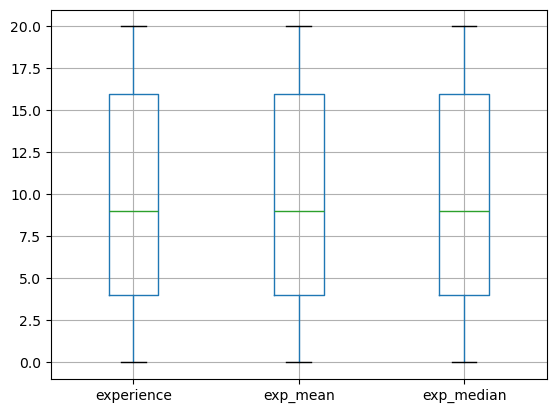

In [14]:
# Make Boxplot to check outliers impact after impuataion:

df[['experience','exp_mean','exp_median']].boxplot()

In [15]:
df.drop(columns=['exp_mean','exp_median'],inplace=True)

**Everything is ok know we impute using Sklearn class Simple imputer**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

**Firstly we do on only one column with (Mean/Median)**

In [17]:
X=df['experience'].values.reshape(-1, 1)# Reshape to 2D array (single feature)
y=df['target'] # Target variable (assuming you're predicting experience)

**Split data into X_train,X_test,y_train,y_test based on 80:20 ratio:** 

In [18]:
#random_state=2 in your code ensures that the data splitting process is deterministic, leading to the same training and testing sets whenever you run the code with this specific random_state value.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
mean_imputer=SimpleImputer(strategy='mean')
median_imputer1=SimpleImputer(strategy='median')

In [20]:
mean_imputer.fit(X_train)

SimpleImputer()

In [21]:
median_imputer1.fit(X_train)

SimpleImputer(strategy='median')

In [22]:
mean_imputer.statistics_


array([9.94462264])

In [23]:
median_imputer1.statistics_

array([9.])

In [24]:
X_train=mean_imputer.transform(X_train)
X_test=mean_imputer.transform(X_test)

In [25]:
X_train1=median_imputer1.transform(X_train)
X_test1=median_imputer1.transform(X_test)

In [26]:
X_train

array([[ 2.],
       [ 8.],
       [ 7.],
       ...,
       [20.],
       [ 7.],
       [ 4.]])

In [27]:
X_test

array([[20.],
       [20.],
       [ 5.],
       ...,
       [ 6.],
       [10.],
       [ 0.]])

In [28]:
X_train1

array([[ 2.],
       [ 8.],
       [ 7.],
       ...,
       [20.],
       [ 7.],
       [ 4.]])

In [29]:
X_test1

array([[20.],
       [20.],
       [ 5.],
       ...,
       [ 6.],
       [10.],
       [ 0.]])

**Now we do on multiple columns one with mean and other one median**

In [30]:
from sklearn.compose import ColumnTransformer

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   experience      19093 non-null  float64
 1   training_hours  18392 non-null  float64
 2   target          19158 non-null  float64
dtypes: float64(3)
memory usage: 449.1 KB


**Repeat all steps on training_hours column**

In [32]:
mean_tra=df['training_hours'].mean()
median_tra=df['training_hours'].median()

print('Mean of training_hours is',mean_tra)
print('Median of training_hours is',median_tra)

Mean of training_hours is 65.18578729882557
Median of training_hours is 47.0


In [33]:
df['tra_mean']=df['training_hours'].fillna(mean_tra)
df['tra_median']=df['training_hours'].fillna(median_tra)

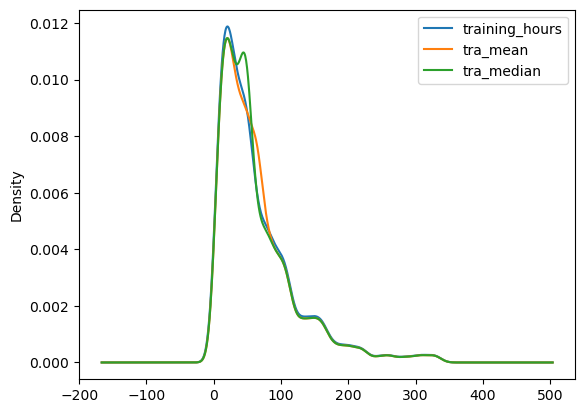

In [34]:
plt.figure()
ax=plt.subplot(1,1,1)

df['training_hours'].plot(kind='kde')
df['tra_mean'].plot(kind='kde')
df['tra_median'].plot(kind='kde')

ax.legend()

In [35]:
print('original data varience before imputation',df['training_hours'].var())
print('After mean imputation',df['tra_mean'].var())
print('After median imputation',df['tra_median'].var())

original data varience before imputation 3586.2881933989347
After mean imputation 3442.889083092338
After median imputation 3455.584421275618


In [36]:
df.corr()

,experience,training_hours,target,tra_mean,tra_median
experience,1.000000,-0.000815,-0.178238,-0.000799,-0.000307
training_hours,-0.000815,1.000000,-0.021706,1.000000,1.000000
target,-0.178238,-0.021706,1.000000,-0.021271,-0.021157
tra_mean,-0.000799,1.000000,-0.021271,1.000000,0.998161
tra_median,-0.000307,1.000000,-0.021157,0.998161,1.000000


<Axes: >

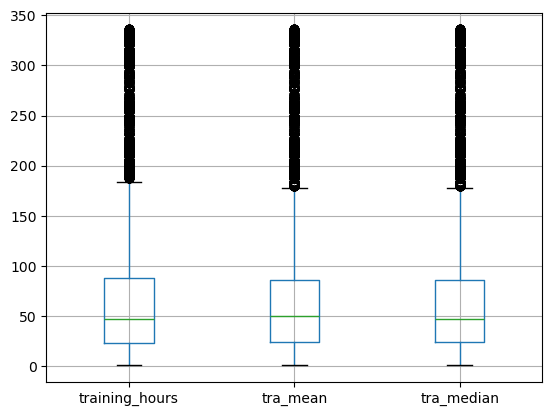

In [37]:
df[['training_hours','tra_mean','tra_median']].boxplot()

**After that i can go with median**

**Now impute using Sklearn class Simple imputer on multiple columns**

In [38]:
x=df[['experience','training_hours']]
Y=df['target']

In [48]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

In [49]:
exp_imputer=SimpleImputer(strategy='median')
tra_imputer=SimpleImputer(strategy='median')

In [50]:
transform=ColumnTransformer([
    ('exp_imputer',exp_imputer,['experience']),
    ('tra_imputer',tra_imputer,['training_hours']),
],remainder='passthrough')

In [51]:
transform.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('exp_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['experience']),
                                ('tra_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['training_hours'])])

In [52]:
transform.named_transformers_['exp_imputer'].statistics_

array([9.])

In [53]:
transform.named_transformers_['tra_imputer'].statistics_

array([47.])

In [54]:
x_train=transform.transform(x_train)
x_test=transform.transform(x_test)

In [55]:
x_train

array([[  2.,  16.],
       [  6., 262.],
       [  3.,  24.],
       ...,
       [ 10.,  57.],
       [  5.,  16.],
       [ 20.,  50.]])

In [56]:
x_test

array([[ 6., 21.],
       [20., 74.],
       [ 9., 94.],
       ...,
       [ 2.,  4.],
       [ 4., 47.],
       [13.,  5.]])